<a href="https://colab.research.google.com/github/hafizamzar/cui-analysis-fyp/blob/main/cui_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from numpy.polynomial.polynomial import polyfit
from sklearn import linear_model
from statistics import mean

%matplotlib inline

In [2]:
cleandata = pd.read_csv('data_cleaned/clean_data.csv')
massloss = pd.read_csv('data_cleaned/mass_loss.csv')
massdata = pd.read_csv('data_cleaned/mass_data.csv')
omanalysis = pd.read_csv('data_cleaned/om_analysis.csv')

In [3]:
cleandata

,Timestamp,Date,Time,Temperature,Humidity,Moisture_10mm,Moisture_20mm
0,22/3/2021 0:06,22/3/2021,12:06:06 AM,26.900000,0.95,0.00,0.00
1,22/3/2021 0:16,22/3/2021,12:16:18 AM,26.799999,0.95,0.00,0.00
2,22/3/2021 0:26,22/3/2021,12:26:30 AM,26.600000,0.95,0.00,0.00
3,22/3/2021 0:36,22/3/2021,12:36:42 AM,26.600000,0.95,0.00,0.00
4,22/3/2021 0:46,22/3/2021,12:46:54 AM,26.600000,0.95,0.00,0.00
...,...,...,...,...,...,...,...
5348,4/5/2021 23:15,4/5/2021,11:15:53 PM,25.900000,0.80,0.29,0.29
5349,4/5/2021 23:26,4/5/2021,11:26:00 PM,25.900000,0.80,0.46,0.46
5350,4/5/2021 23:36,4/5/2021,11:36:07 PM,25.900000,0.80,0.40,0.40
5351,4/5/2021 23:46,4/5/2021,11:46:15 PM,25.900000,0.80,0.32,0.32


In [4]:
cleandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Timestamp      5353 non-null   object 
 1   Date           5353 non-null   object 
 2   Time           5353 non-null   object 
 3   Temperature    5353 non-null   float64
 4   Humidity       5353 non-null   float64
 5   Moisture_10mm  5353 non-null   float64
 6   Moisture_20mm  4690 non-null   float64
dtypes: float64(4), object(3)
memory usage: 292.9+ KB


In [5]:
cleandata['Timestamp'] =  pd.to_datetime(cleandata['Timestamp'], infer_datetime_format=True)
cleandata['Time'] =  pd.to_datetime(cleandata['Time'], infer_datetime_format=True)
cleandata['Date'] =  pd.to_datetime(cleandata['Date'], infer_datetime_format=True)

In [6]:
cleandata

,Timestamp,Date,Time,Temperature,Humidity,Moisture_10mm,Moisture_20mm
0,2021-03-22 00:06:00,2021-03-22,2021-06-19 00:06:06,26.900000,0.95,0.00,0.00
1,2021-03-22 00:16:00,2021-03-22,2021-06-19 00:16:18,26.799999,0.95,0.00,0.00
2,2021-03-22 00:26:00,2021-03-22,2021-06-19 00:26:30,26.600000,0.95,0.00,0.00
3,2021-03-22 00:36:00,2021-03-22,2021-06-19 00:36:42,26.600000,0.95,0.00,0.00
4,2021-03-22 00:46:00,2021-03-22,2021-06-19 00:46:54,26.600000,0.95,0.00,0.00
...,...,...,...,...,...,...,...
5348,2021-05-04 23:15:00,2021-05-04,2021-06-19 23:15:53,25.900000,0.80,0.29,0.29
5349,2021-05-04 23:26:00,2021-05-04,2021-06-19 23:26:00,25.900000,0.80,0.46,0.46
5350,2021-05-04 23:36:00,2021-05-04,2021-06-19 23:36:07,25.900000,0.80,0.40,0.40
5351,2021-05-04 23:46:00,2021-05-04,2021-06-19 23:46:15,25.900000,0.80,0.32,0.32


In [7]:
cleandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Timestamp      5353 non-null   datetime64[ns]
 1   Date           5353 non-null   datetime64[ns]
 2   Time           5353 non-null   datetime64[ns]
 3   Temperature    5353 non-null   float64       
 4   Humidity       5353 non-null   float64       
 5   Moisture_10mm  5353 non-null   float64       
 6   Moisture_20mm  4690 non-null   float64       
dtypes: datetime64[ns](3), float64(4)
memory usage: 292.9 KB


In [8]:
cleandata.describe()

,Temperature,Humidity,Moisture_10mm,Moisture_20mm
count,5353.000000,5353.000000,5353.000000,4690.000000
mean,29.316944,0.629206,0.170043,0.196640
std,5.021785,0.192949,0.169795,0.185264
min,23.299999,0.100000,0.000000,0.000000
25%,25.500000,0.480000,0.000000,0.000000
50%,27.000000,0.640000,0.140000,0.180000
75%,32.900002,0.800000,0.320000,0.360000
max,50.799999,0.970000,0.920000,0.920000


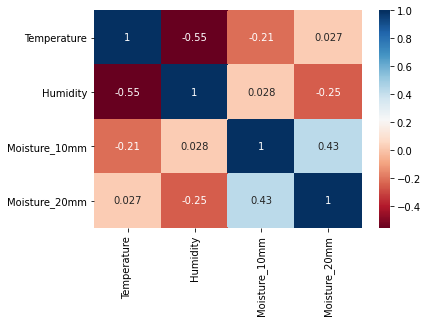

In [9]:
import seaborn as sb
corr = cleandata.corr()
sb.heatmap(corr, cmap="RdBu", annot=True)

In [10]:
cleandata['Index'] = cleandata.index

In [11]:
cleandata

,Timestamp,Date,Time,Temperature,Humidity,Moisture_10mm,Moisture_20mm,Index
0,2021-03-22 00:06:00,2021-03-22,2021-06-19 00:06:06,26.900000,0.95,0.00,0.00,0
1,2021-03-22 00:16:00,2021-03-22,2021-06-19 00:16:18,26.799999,0.95,0.00,0.00,1
2,2021-03-22 00:26:00,2021-03-22,2021-06-19 00:26:30,26.600000,0.95,0.00,0.00,2
3,2021-03-22 00:36:00,2021-03-22,2021-06-19 00:36:42,26.600000,0.95,0.00,0.00,3
4,2021-03-22 00:46:00,2021-03-22,2021-06-19 00:46:54,26.600000,0.95,0.00,0.00,4
...,...,...,...,...,...,...,...,...
5348,2021-05-04 23:15:00,2021-05-04,2021-06-19 23:15:53,25.900000,0.80,0.29,0.29,5348
5349,2021-05-04 23:26:00,2021-05-04,2021-06-19 23:26:00,25.900000,0.80,0.46,0.46,5349
5350,2021-05-04 23:36:00,2021-05-04,2021-06-19 23:36:07,25.900000,0.80,0.40,0.40,5350
5351,2021-05-04 23:46:00,2021-05-04,2021-06-19 23:46:15,25.900000,0.80,0.32,0.32,5351


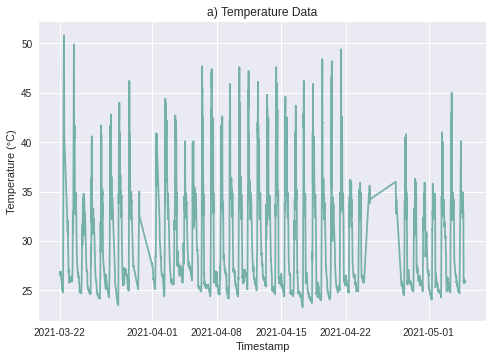

In [12]:
#Temperature
style.use('seaborn')
plt.title('a) Temperature Data')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.plot(cleandata.Timestamp,cleandata.Temperature,c='#75b1a9')
plt.show()

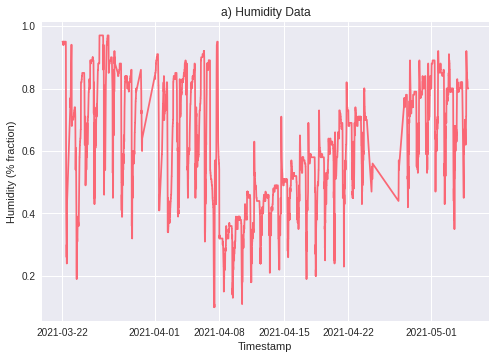

In [13]:
#Humidity
style.use('seaborn')
plt.title('a) Humidity Data')
plt.xlabel('Timestamp')
plt.ylabel('Humidity (% fraction)')
plt.plot(cleandata.Timestamp,cleandata.Humidity,c='#fa6775')
plt.show()

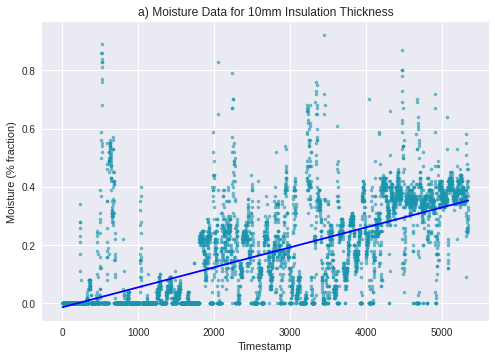

In [14]:
x = cleandata.loc[:,"Index"]
y = cleandata.loc[:,"Moisture_10mm"]

b, m = polyfit(x, y, 1)

plt.title('a) Moisture Data for 10mm Insulation Thickness')
plt.xlabel('Timestamp')
plt.ylabel('Moisture (% fraction)')
plt.scatter(x,y,alpha=0.6,s=10,c='#1995ad')
plt.plot(x, b + m * x, '-', c='b')
plt.show()

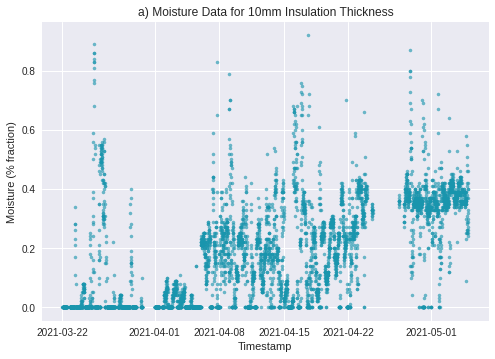

In [15]:
#10mm Moisture
style.use('seaborn')
plt.title('a) Moisture Data for 10mm Insulation Thickness')
plt.xlabel('Timestamp')
plt.ylabel('Moisture (% fraction)')
plt.scatter(cleandata.Timestamp,cleandata.Moisture_10mm,alpha=0.6,s=10,c='#1995ad')
plt.show()

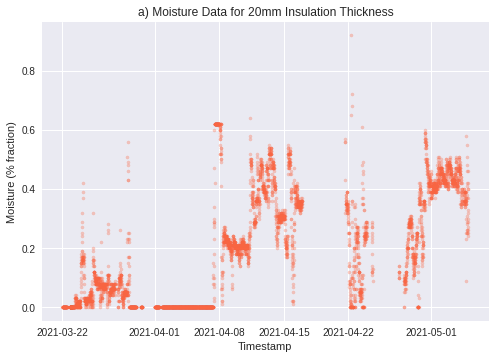

In [16]:
#20mm Moisture
style.use('seaborn')
plt.title('a) Moisture Data for 20mm Insulation Thickness')
plt.xlabel('Timestamp')
plt.ylabel('Moisture (% fraction)')
plt.scatter(cleandata.Timestamp,cleandata.Moisture_20mm,alpha=0.3,s=10,color='#fb6542')
plt.show()

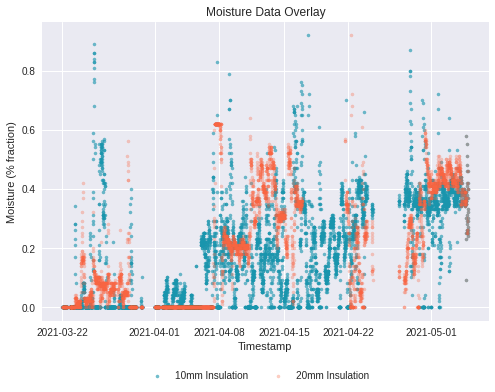

In [17]:
#Overlay 10mm and 20mm Moisture
style.use('seaborn')
plt.title('Moisture Data Overlay')
plt.xlabel('Timestamp')
plt.ylabel('Moisture (% fraction)')

plt.scatter(cleandata.Timestamp,cleandata.Moisture_10mm,alpha=0.6,s=10,c='#1995ad')
plt.scatter(cleandata.Timestamp,cleandata.Moisture_20mm,alpha=0.3,s=10,color='#fb6542')

plt.legend(['10mm Insulation','20mm Insulation'],loc = 'lower center',bbox_to_anchor = (0,-0.05,1,2), ncol=2, bbox_transform = plt.gcf().transFigure )


plt.show()

Moisture_10mm       AxesSubplot(0.125,0.536818;0.227941x0.343182)
Moisture_20mm    AxesSubplot(0.398529,0.536818;0.227941x0.343182)
dtype: object

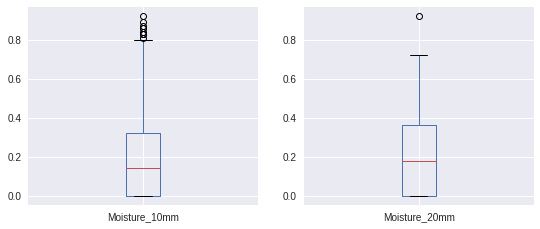

In [18]:
#Boxplot Moisture
boxplot_cols = ['Date', 'Time', 'Moisture_10mm', 'Moisture_20mm']

cleandata[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

Temperature       AxesSubplot(0.125,0.536818;0.227941x0.343182)
Humidity       AxesSubplot(0.398529,0.536818;0.227941x0.343182)
dtype: object

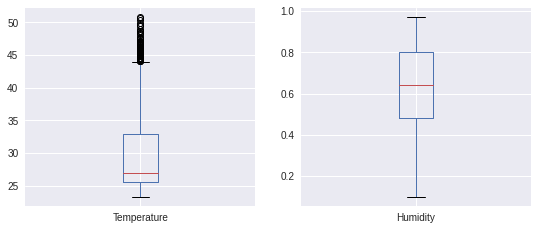

In [19]:
#Boxplot Temperature and Humidity
boxplot_cols = ['Date', 'Time', 'Temperature', 'Humidity']

cleandata[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87d58f9dd0>,
      dtype=object)

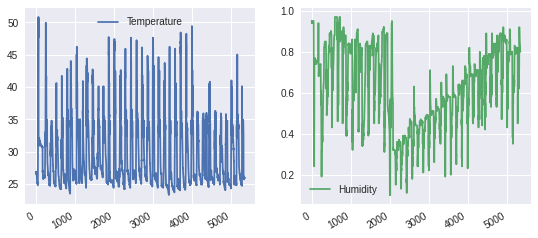

In [20]:
lineplot_cols = ['Temperature', 'Humidity']

cleandata[lineplot_cols].plot(kind='line', subplots=True, layout=(1,3), figsize=(14,4))

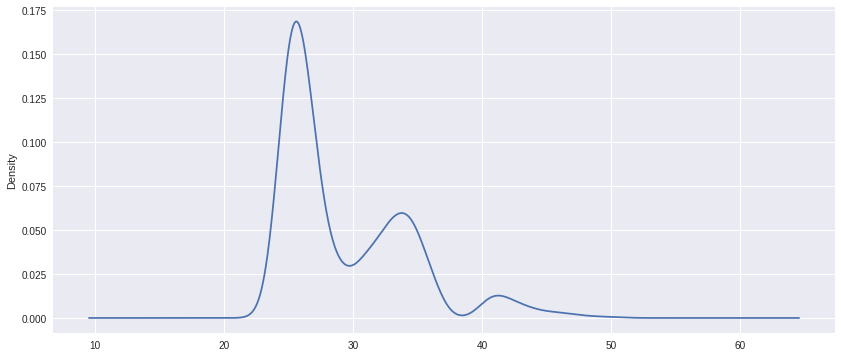

In [21]:
cleandata['Temperature'].plot(kind='density', figsize=(14,6))

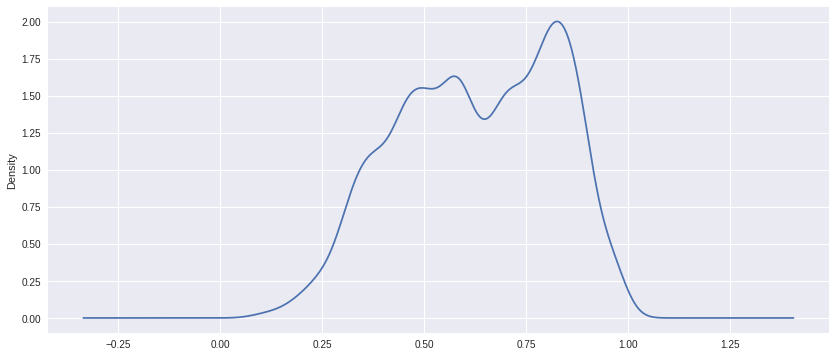

In [22]:
cleandata['Humidity'].plot(kind='density', figsize=(14,6))

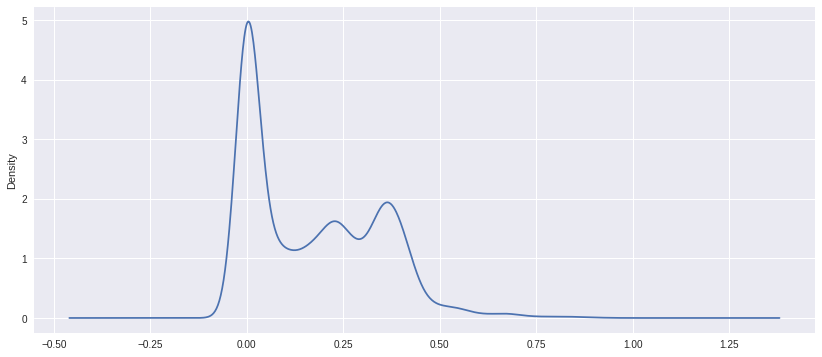

In [23]:
cleandata['Moisture_10mm'].plot(kind='density', figsize=(14,6))

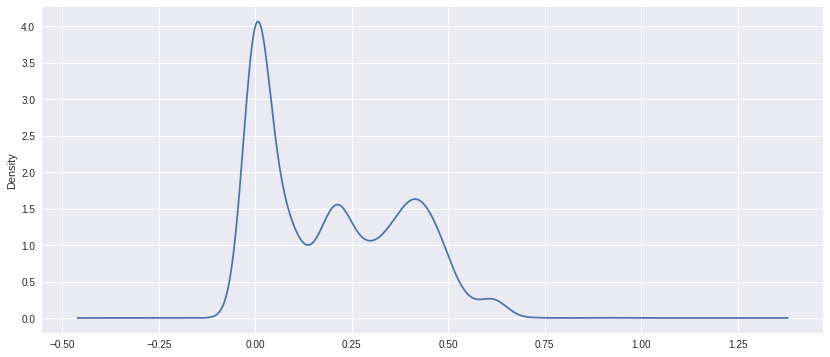

In [24]:
cleandata['Moisture_20mm'].plot(kind='density', figsize=(14,6))

In [25]:
corr = cleandata.corr()

corr

,Temperature,Humidity,Moisture_10mm,Moisture_20mm,Index
Temperature,1.000000,-0.554548,-0.208792,0.027290,-0.059482
Humidity,-0.554548,1.000000,0.028100,-0.248181,-0.081571
Moisture_10mm,-0.208792,0.028100,1.000000,0.434893,0.622984
Moisture_20mm,0.027290,-0.248181,0.434893,1.000000,0.658214
Index,-0.059482,-0.081571,0.622984,0.658214,1.000000


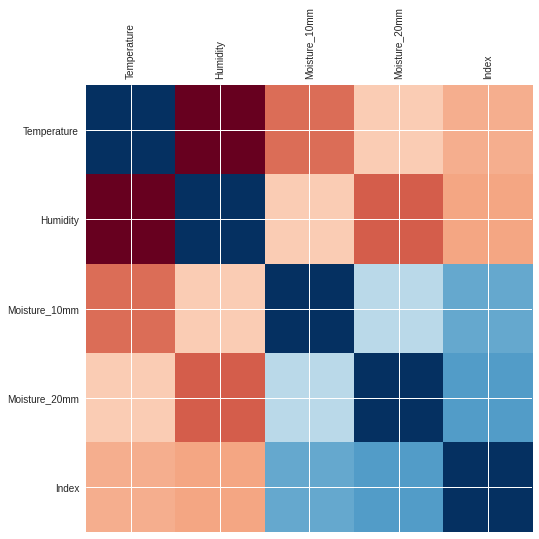

In [26]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

plt.legend(['10mm Insulation','20mm Insulation'])

In [27]:
massloss

,Sample_ID,Exposure_Weeks,Exposure_Hours,Insulation_Thickness,Initial_Mass,Cycle1_Mass,Cycle2_Mass,Final_Mass,Percentage_Mass_Loss,Corrosion_Rate
0,A1-2,3,504,10,9.1691,9.1638,9.1616,9.1616,0.000814,0.02562
1,A2-1,3,504,10,10.0657,10.0553,10.0530,10.0574,0.000745,0.02574
2,B2-1,3,504,20,9.7609,9.7547,9.7528,9.7527,0.000837,0.02803
3,B2-2,3,504,20,9.6423,9.6350,9.6345,9.6339,0.000875,0.02894
4,A1-1,6,1008,10,10.4139,10.4024,10.4018,10.4006,0.001277,0.02282
5,A2-2,6,1008,10,9.4986,9.4910,9.4893,9.4883,0.001084,0.01767
6,B1-1,6,1008,20,9.2747,9.2668,9.2648,9.2646,0.001085,0.01727
7,B1-2,6,1008,20,9.2983,9.2965,9.2942,9.2828,0.001663,0.02654


In [28]:
massloss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sample_ID             8 non-null      object 
 1   Exposure_Weeks        8 non-null      int64  
 2   Exposure_Hours        8 non-null      int64  
 3   Insulation_Thickness  8 non-null      int64  
 4   Initial_Mass          8 non-null      float64
 5   Cycle1_Mass           8 non-null      float64
 6   Cycle2_Mass           8 non-null      float64
 7   Final_Mass            8 non-null      float64
 8   Percentage_Mass_Loss  8 non-null      float64
 9   Corrosion_Rate        8 non-null      float64
dtypes: float64(6), int64(3), object(1)
memory usage: 768.0+ bytes


In [29]:
massloss.describe()

,Exposure_Weeks,Exposure_Hours,Insulation_Thickness,Initial_Mass,Cycle1_Mass,Cycle2_Mass,Final_Mass,Percentage_Mass_Loss,Corrosion_Rate
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,4.500000,756.000000,15.000000,9.640437,9.633188,9.631500,9.630237,0.001048,0.024079
std,1.603567,269.399332,5.345225,0.428737,0.426410,0.426784,0.428470,0.000306,0.004463
min,3.000000,504.000000,10.000000,9.169100,9.163800,9.161600,9.161600,0.000745,0.017270
25%,3.000000,504.000000,10.000000,9.292400,9.289075,9.286850,9.278250,0.000831,0.021532
50%,4.500000,756.000000,15.000000,9.570450,9.563000,9.561900,9.561100,0.000980,0.025680
75%,6.000000,1008.000000,20.000000,9.837100,9.829850,9.827850,9.828875,0.001133,0.026912
max,6.000000,1008.000000,20.000000,10.413900,10.402400,10.401800,10.400600,0.001663,0.028940


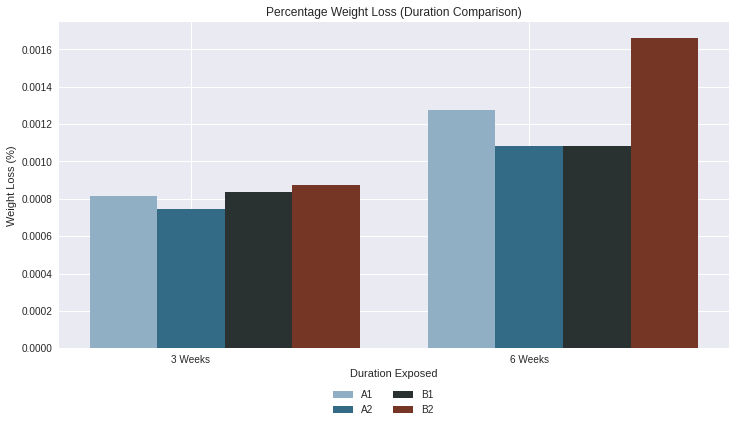

In [30]:
#3 weeks vs 6 weeks Percentage Mass Loss
plt.figure(figsize=(12, 6))

N = 2
ind = np.arange(N) 
width = 0.2
  
wvals = [massloss.Percentage_Mass_Loss[0], massloss.Percentage_Mass_Loss[4]]
bar1 = plt.bar(ind, wvals, width, color = '#90afc5')
xvals = [massloss.Percentage_Mass_Loss[1], massloss.Percentage_Mass_Loss[5]]
bar2 = plt.bar(ind+width, xvals, width, color = '#336b87')
yvals = [massloss.Percentage_Mass_Loss[2], massloss.Percentage_Mass_Loss[6]]
bar3 = plt.bar(ind+width*2, yvals, width, color='#2a3131')
zvals = [massloss.Percentage_Mass_Loss[3], massloss.Percentage_Mass_Loss[7]]
bar4 = plt.bar(ind+width*3, zvals, width, color = '#763626')
  
plt.xlabel("Duration Exposed")
plt.ylabel('Weight Loss (%)')
plt.title('Percentage Weight Loss (Duration Comparison)')

plt.xticks(ind+width,['3 Weeks', '6 Weeks'])
plt.legend( (bar1, bar2, bar3, bar4), ('A1', 'A2','B1','B2'), 
           loc = 'lower center',bbox_to_anchor = (0,-0.05,1,2), 
           ncol=2, bbox_transform = plt.gcf().transFigure )

plt.show()

Percentage_Mass_Loss       AxesSubplot(0.125,0.536818;0.227941x0.343182)
Corrosion_Rate          AxesSubplot(0.398529,0.536818;0.227941x0.343182)
dtype: object

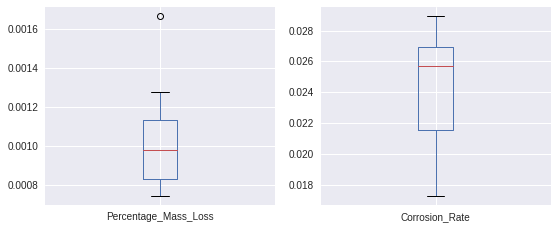

In [31]:
#Boxplot Temperature and Humidity
boxplot_cols = ['Percentage_Mass_Loss', 'Corrosion_Rate']

massloss[boxplot_cols].plot(kind='box',subplots=True, layout=(2,3), figsize=(14,8))

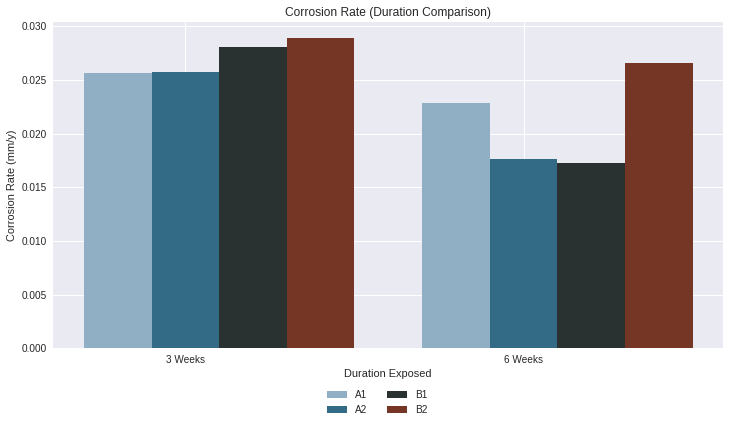

In [32]:
#3 weeks vs 6 weeks Corrosion Rate
plt.figure(figsize=(12, 6))

N = 2
ind = np.arange(N) 
width = 0.2
  
wvals = [massloss.Corrosion_Rate[0], massloss.Corrosion_Rate[4]]
bar1 = plt.bar(ind, wvals, width, color = '#90afc5')
  
xvals = [massloss.Corrosion_Rate[1], massloss.Corrosion_Rate[5]]
bar2 = plt.bar(ind+width, xvals, width, color = '#336b87')

yvals = [massloss.Corrosion_Rate[2], massloss.Corrosion_Rate[6]]
bar3 = plt.bar(ind+width*2, yvals, width, color='#2a3131')
  
zvals = [massloss.Corrosion_Rate[3], massloss.Corrosion_Rate[7]]
bar4 = plt.bar(ind+width*3, zvals, width, color = '#763626')
  
plt.xlabel("Duration Exposed")
plt.ylabel('Corrosion Rate (mm/y)')
plt.title('Corrosion Rate (Duration Comparison)')
  
plt.xticks(ind+width,['3 Weeks', '6 Weeks'])
plt.legend( (bar1, bar2, bar3, bar4), ('A1', 'A2','B1','B2'), loc = 'lower center',bbox_to_anchor = (0,-0.05,1,2), ncol=2, bbox_transform = plt.gcf().transFigure )

plt.show()

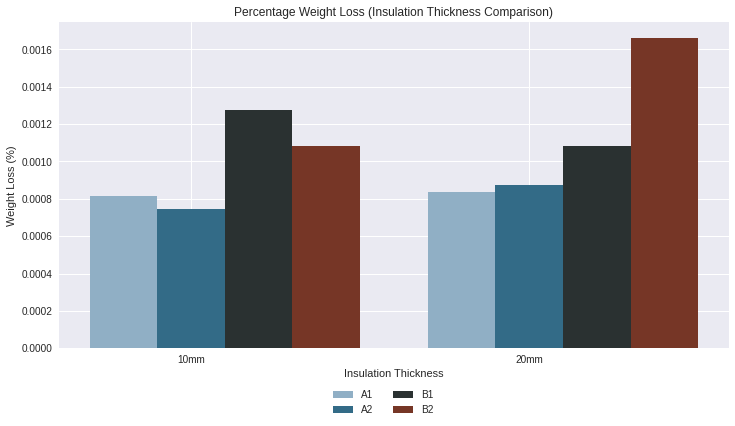

In [33]:
#10mm vs 20mm Percentage Mass Loss
plt.figure(figsize=(12, 6))

N = 2
ind = np.arange(N) 
width = 0.2
  
wvals = [massloss.Percentage_Mass_Loss[0], massloss.Percentage_Mass_Loss[2]]
bar1 = plt.bar(ind, wvals, width, color = '#90afc5')
  
xvals = [massloss.Percentage_Mass_Loss[1], massloss.Percentage_Mass_Loss[3]]
bar2 = plt.bar(ind+width, xvals, width, color = '#336b87')

yvals = [massloss.Percentage_Mass_Loss[4], massloss.Percentage_Mass_Loss[6]]
bar3 = plt.bar(ind+width*2, yvals, width, color='#2a3131')
  
zvals = [massloss.Percentage_Mass_Loss[5], massloss.Percentage_Mass_Loss[7]]
bar4 = plt.bar(ind+width*3, zvals, width, color = '#763626')
  
plt.xlabel("Insulation Thickness")
plt.ylabel('Weight Loss (%)')
plt.title('Percentage Weight Loss (Insulation Thickness Comparison)')

plt.xticks(ind+width,['10mm', '20mm'])
plt.legend( (bar1, bar2, bar3, bar4), ('A1', 'A2','B1','B2'), loc = 'lower center',bbox_to_anchor = (0,-0.05,1,2), ncol=2, bbox_transform = plt.gcf().transFigure )

plt.show()

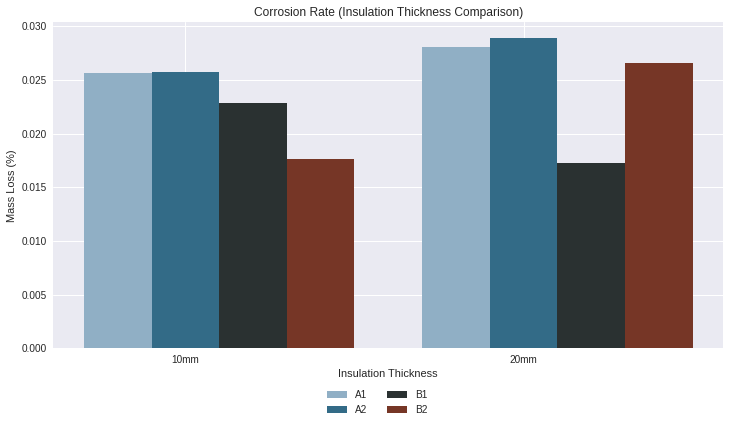

In [34]:
#10mm vs 20mm Corrosion Rate
plt.figure(figsize=(12, 6))

N = 2
ind = np.arange(N) 
width = 0.2
  
wvals = [massloss.Corrosion_Rate[0], massloss.Corrosion_Rate[2]]
bar1 = plt.bar(ind, wvals, width, color = '#90afc5')
  
xvals = [massloss.Corrosion_Rate[1], massloss.Corrosion_Rate[3]]
bar2 = plt.bar(ind+width, xvals, width, color = '#336b87')

yvals = [massloss.Corrosion_Rate[4], massloss.Corrosion_Rate[6]]
bar3 = plt.bar(ind+width*2, yvals, width, color='#2a3131')
  
zvals = [massloss.Corrosion_Rate[5], massloss.Corrosion_Rate[7]]
bar4 = plt.bar(ind+width*3, zvals, width, color = '#763626')
  
plt.xlabel("Insulation Thickness")
plt.ylabel('Mass Loss (%)')
plt.title('Corrosion Rate (Insulation Thickness Comparison)')

plt.xticks(ind+width,['10mm', '20mm'])
plt.legend( (bar1, bar2, bar3, bar4), ('A1', 'A2','B1','B2'), loc = 'lower center',bbox_to_anchor = (0,-0.05,1,2), ncol=2, bbox_transform = plt.gcf().transFigure )

plt.show()

In [35]:
omanalysis

,Samples_Number,Sample_ID,Percentage_Corroded,Insulation_Thickness,Duration,Optical_Zoom
0,4,A,54.997508,10,3,10
1,7,B,57.966201,10,6,10
2,2,C,57.215341,20,3,10
3,3,D,63.182958,20,6,10


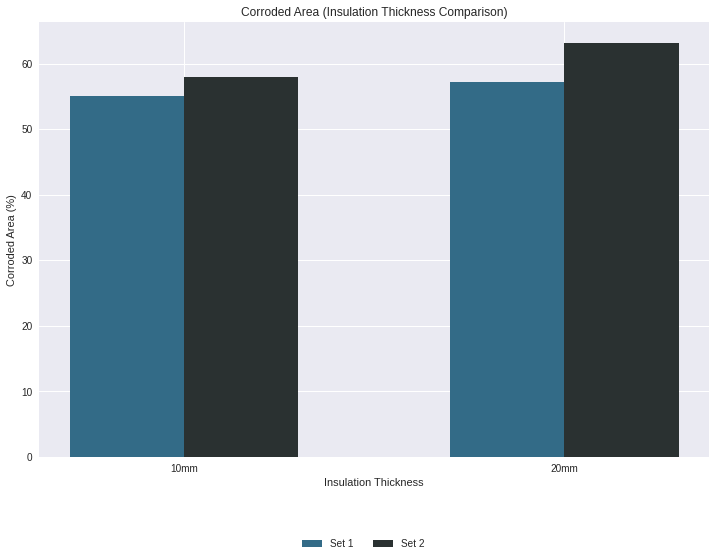

In [36]:
#10mm vs 20mm 
plt.figure(figsize=(12, 8))

N = 2
ind = np.arange(N) 
width = 0.3
  
xvals = [omanalysis.Percentage_Corroded[0], omanalysis.Percentage_Corroded[2]]
bar1 = plt.bar(ind+width, xvals, width, color = '#336b87')

yvals = [omanalysis.Percentage_Corroded[1], omanalysis.Percentage_Corroded[3]]
bar2 = plt.bar(ind+width*2, yvals, width, color='#2a3131')
  
style.use('seaborn')
plt.xlabel("Insulation Thickness")
plt.ylabel('Corroded Area (%)')
plt.title('Corroded Area (Insulation Thickness Comparison)')

plt.xticks(ind+width*1.5,['10mm', '20mm'])
plt.legend( (bar1, bar2), ('Set 1', 'Set 2'), 
           loc = 'lower center',bbox_to_anchor = (0,-0.05,1,2), ncol=2, bbox_transform = plt.gcf().transFigure )
plt.show()

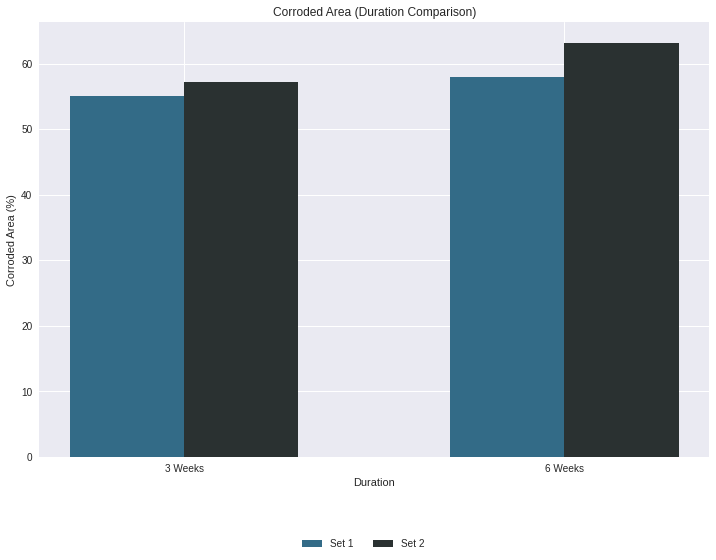

In [37]:
#3 v 6 weeks
plt.figure(figsize=(12, 8))

N = 2
ind = np.arange(N) 
width = 0.3
  
xvals = [omanalysis.Percentage_Corroded[0], omanalysis.Percentage_Corroded[1]]
bar1 = plt.bar(ind+width, xvals, width, color = '#336b87')

yvals = [omanalysis.Percentage_Corroded[2], omanalysis.Percentage_Corroded[3]]
bar2 = plt.bar(ind+width*2, yvals, width, color='#2a3131')
  
plt.xlabel("Duration")
plt.ylabel('Corroded Area (%)')
plt.title('Corroded Area (Duration Comparison)')

plt.xticks(ind+width*1.5,['3 Weeks', '6 Weeks'])
plt.legend( (bar1, bar2), ('Set 1', 'Set 2'), 
           loc = 'lower center',bbox_to_anchor = (0,-0.05,1,2), ncol=2, bbox_transform = plt.gcf().transFigure )

plt.show()